**Automobile price prediction**

Exploratory Data Analysis

<h1 id="data_acquisition">Data Acquisition</h1>
<p>
There are various formats for a dataset, .csv, .json, .xlsx  etc. The dataset can be stored in different places, on your local machine or sometimes online.<br>
In this section, you will learn how to load a dataset into our Jupyter Notebook.<br>
In our case, the Automobile Dataset is an online source, and it is in CSV (comma separated value) format. Let's use this dataset as an example to practice data reading.
<ul>
    <li>data source: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a></li>
    <li>data type: csv</li>
</ul>
The Pandas Library is a useful tool that enables us to read various datasets into a data frame; our Jupyter notebook platforms have a built-in <b>Pandas Library</b> so that all we need to do is import Pandas without installing.
</p>

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [4]:
missing_values = ['?']
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv", 
                 na_values=missing_values, 
                 names= ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
                          "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
                          "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
                            "peak-rpm","city-mpg","highway-mpg","price"])

In [5]:
pd.set_option('display.max_rows',205)
pd.set_option('display.max_columns',26)

In [5]:
df.shape

(205, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [47]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [48]:
df.fillna(df.mean(), inplace=True)             #replacing null values with mean 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [10]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,205.0,122.000000,31.681008,65.00,101.00,122.00,137.00,256.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329751,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255423,0.313597,2.07,3.11,3.29,3.41,4.17


In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


##Analyzing Individual Feature Patterns using Visualization

Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

symboling value count for each category: 
  0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64


<Figure size 1440x2160 with 0 Axes>

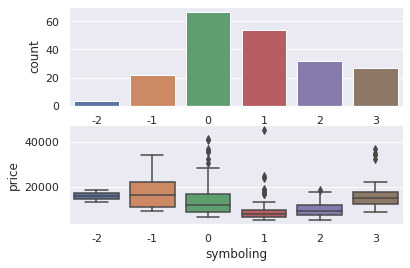

In [40]:
print('symboling value count for each category:', '\n' , df['symboling'].value_counts())
fig = plt.figure(figsize=(20,30))
fig, axes = plt.subplots(2,1)
sns.countplot(x=df['symboling'], ax=axes[0])
sns.boxplot(x=df['symboling'], y="price", data=df, ax=axes[1])

We see that the distributions of price between the different symboling categories have a significant overlap, and so symboling would not be a good predictor of price, Let's examine engine "make" and "price":

make value count for each category: 
 toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64


<Figure size 2880x2160 with 0 Axes>

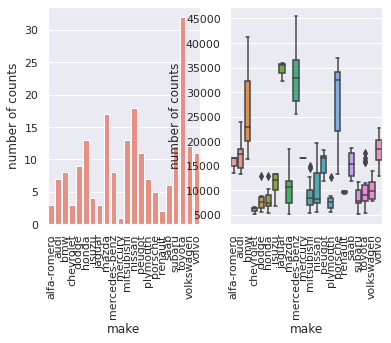

In [42]:
print('make value count for each category:', '\n' , df['make'].value_counts())
plt.figure(figsize=(20,30))
fig, axes = plt.subplots(1,2)

ax1= sns.countplot(x=df['make'], color= 'salmon',ax=axes[0])
ax2 = sns.boxplot(x=df['make'], y=df['price'], ax=axes[1])
ax2.set(xlabel='make', ylabel='number of counts')
ax2.set_xticklabels(rotation= 90, labels=['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda','isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
                                          'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault','saab', 'subaru', 'toyota', 'volkswagen', 'volvo'])


ax1.set(xlabel='make', ylabel='number of counts')
ax1.set_xticklabels(rotation= 90, labels=['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda','isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
                                          'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault','saab', 'subaru', 'toyota', 'volkswagen', 'volvo'])

plt.show()

We see that the distributions of price between the different make categories 
have a significant difference,mercedes-benz has highest price and jaguar has price distribution between 30000 to 40000. In data toyota has more than 30 cars but price for them is in range 5000 to 15000.
, Let's examine engine "fuel-type" and "price":

fuel-type value count for each category: 
 gas       185
diesel     20
Name: fuel-type, dtype: int64


<Figure size 1440x2160 with 0 Axes>

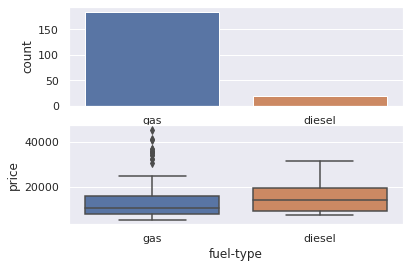

In [43]:
print('fuel-type value count for each category:', '\n' , df['fuel-type'].value_counts())
fig = plt.figure(figsize=(20,30))
fig, axes = plt.subplots(2,1)
sns.countplot(x=df['fuel-type'], ax=axes[0])
sns.boxplot(x=df['fuel-type'], y="price", data=df, ax=axes[1])


We see that the distributions of price between the different fule-type is same but for gas vehicles price range go beyond the maximum value. From the graph it is clear that gas cars are more expensive as comapre to diesel.
, Let's examine  "aspiration" and "price":

aspiration value count for each category: 
 std      168
turbo     37
Name: aspiration, dtype: int64


<Figure size 1440x2160 with 0 Axes>

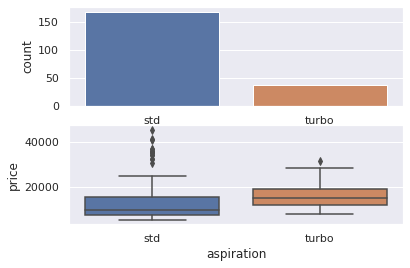

In [50]:
print('aspiration value count for each category:', '\n' , df['aspiration'].value_counts())
fig = plt.figure(figsize=(20,30))
fig, axes = plt.subplots(2,1)
sns.countplot(x=df['aspiration'], ax=axes[0])
sns.boxplot(x=df['aspiration'], y="price", data=df, ax=axes[1])

We see that the distributions of price between the different aspiration is same but for std vehicles price range go beyond the maximum value. From the graph it is clear that std cars are more expensive as comapre to turbo. , Let's examine "num-of-doors" and "price":

num-of-doors value count for each category: 
 four    114
two      89
Name: num-of-doors, dtype: int64


<Figure size 1440x2160 with 0 Axes>

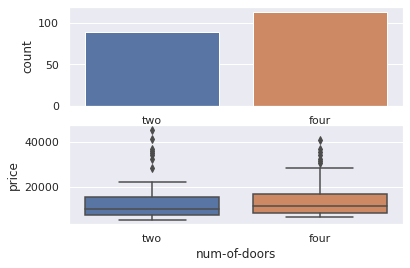

In [39]:
print('num-of-doors value count for each category:', '\n' , df['num-of-doors'].value_counts())
fig = plt.figure(figsize=(20,30))
fig, axes = plt.subplots(2,1)
sns.countplot(x=df['num-of-doors'], ax=axes[0])
sns.boxplot(x=df['num-of-doors'], y="price", data=df, ax=axes[1])

We see that the distributions of price between the different num-of-doors has same but for two doors vehicles price range go beyond the maximum value. From the graph it is clear that two doors cars are more expensive as comapre to four-doors. , Let's examine "body-style" and "price":

body-style value count for each category: 
 sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64


<Figure size 1440x2160 with 0 Axes>

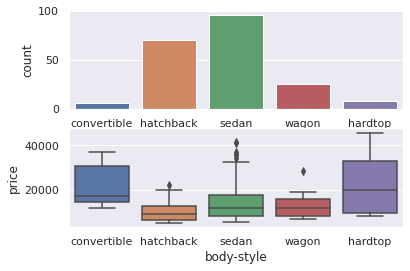

In [49]:
print('body-style value count for each category:', '\n' , df['body-style'].value_counts())
fig = plt.figure(figsize=(20,30))
fig, axes = plt.subplots(2,1)
sns.countplot(x=df['body-style'], ax=axes[0])
sns.boxplot(x=df['body-style'], y="price", data=df, ax=axes[1])


We see that the distributions of price between the different body-style has not exactly overlap for convertible cars price distribution is beetween150000 to 40000 but for sedan and hardtop highest price goes beyond 40000. Let's examine "drive-wheels" and "price":

drive-wheels value count for each category: 
 fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64


<Figure size 1440x2160 with 0 Axes>

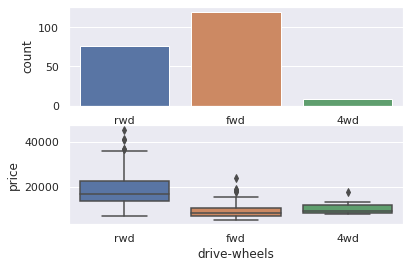

In [48]:
print('drive-wheels value count for each category:', '\n' , df['drive-wheels'].value_counts())
fig = plt.figure(figsize=(20,30))
fig, axes = plt.subplots(2,1)
sns.countplot(x=df['drive-wheels'], ax=axes[0])
sns.boxplot(x=df['drive-wheels'], y="price", data=df, ax=axes[1])

We see that the distributions of price between the different drive-wheels has not exactly overlap. rwd cars price distribution is beetween 150000 to 40000 and it has price of cars beyond max limit so we can say that rwd cars are expensive comapre to others. Let's examine "engine-location" and "price":

engine-location value count for each category: 
 front    202
rear       3
Name: engine-location, dtype: int64


<Figure size 1440x2160 with 0 Axes>

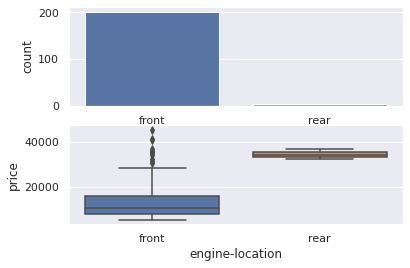

In [47]:
print('engine-location value count for each category:', '\n' , df['engine-location'].value_counts())
fig = plt.figure(figsize=(20,30))
fig, axes = plt.subplots(2,1)
sns.countplot(x=df['engine-location'], ax=axes[0])
sns.boxplot(x=df['engine-location'], y="price", data=df, ax=axes[1])



We see that the distributions of price between the different engine-location has not overlap. From the graph it is clear that rear engine location cars has high price range.Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 202 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location. Let's examine "engine-type" and "price":

engine-type value count for each category: 
 ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64


<Figure size 1440x2160 with 0 Axes>

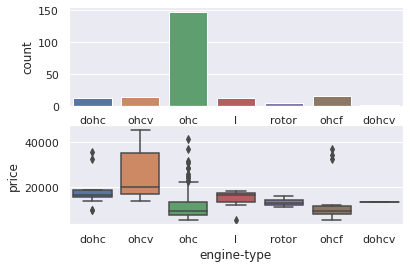

In [46]:

print('engine-type value count for each category:', '\n' , df['engine-type'].value_counts())
fig = plt.figure(figsize=(20,30))
fig, axes = plt.subplots(2,1)
sns.countplot(x=df['engine-type'], ax=axes[0])
sns.boxplot(x=df['engine-type'], y="price", data=df, ax=axes[1])

We see that the distributions of price between the different engine-type has not overlap. From the graph it is clear that ohcv engine cars has price range between 15000 to 50000. second ohc engine cars has price beyond the max price limit. Let's examine "num-of-cylinder" and "price":

num-of-cylinders value count for each category: 
 four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64


<Figure size 1440x2160 with 0 Axes>

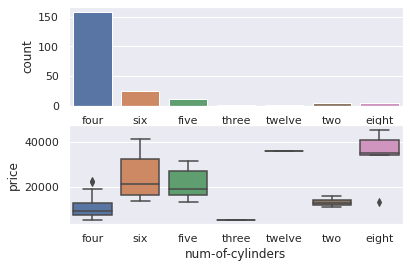

In [45]:
print('num-of-cylinders value count for each category:', '\n' , df['num-of-cylinders'].value_counts())
fig = plt.figure(figsize=(20,30))
fig, axes = plt.subplots(2,1)
sns.countplot(x=df['num-of-cylinders'], ax=axes[0])
sns.boxplot(x=df['num-of-cylinders'], y="price", data=df, ax=axes[1])

We see that the distributions of price between the different engine-type has not overlap. From the graph it is clear that 8 cylinder engine cars has high price range . Let's examine "fule-system" and "price":

fuel-system value count for each category: 
 mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64


<Figure size 1440x2160 with 0 Axes>

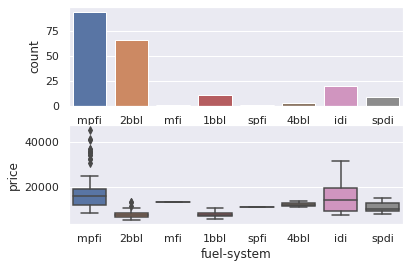

In [44]:

print('fuel-system value count for each category:', '\n' , df['fuel-system'].value_counts())
fig = plt.figure(figsize=(20,30))
fig, axes = plt.subplots(2,1)
sns.countplot(x=df['fuel-system'], ax=axes[0])
sns.boxplot(x=df['fuel-system'], y="price", data=df, ax=axes[1])

We see that the distributions of price between the different fule-type has overlap. From the graph it is clear that mpfi fule type cars has high price range . Let's examine "fule-system" and "price":

In [ ]:
df_num = df[[ 'normalized-losses','wheel-base', 'length', 'width', 'height', 'curb-weight','engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg','highway-mpg', 'price']]

<Figure size 1800x1440 with 0 Axes>

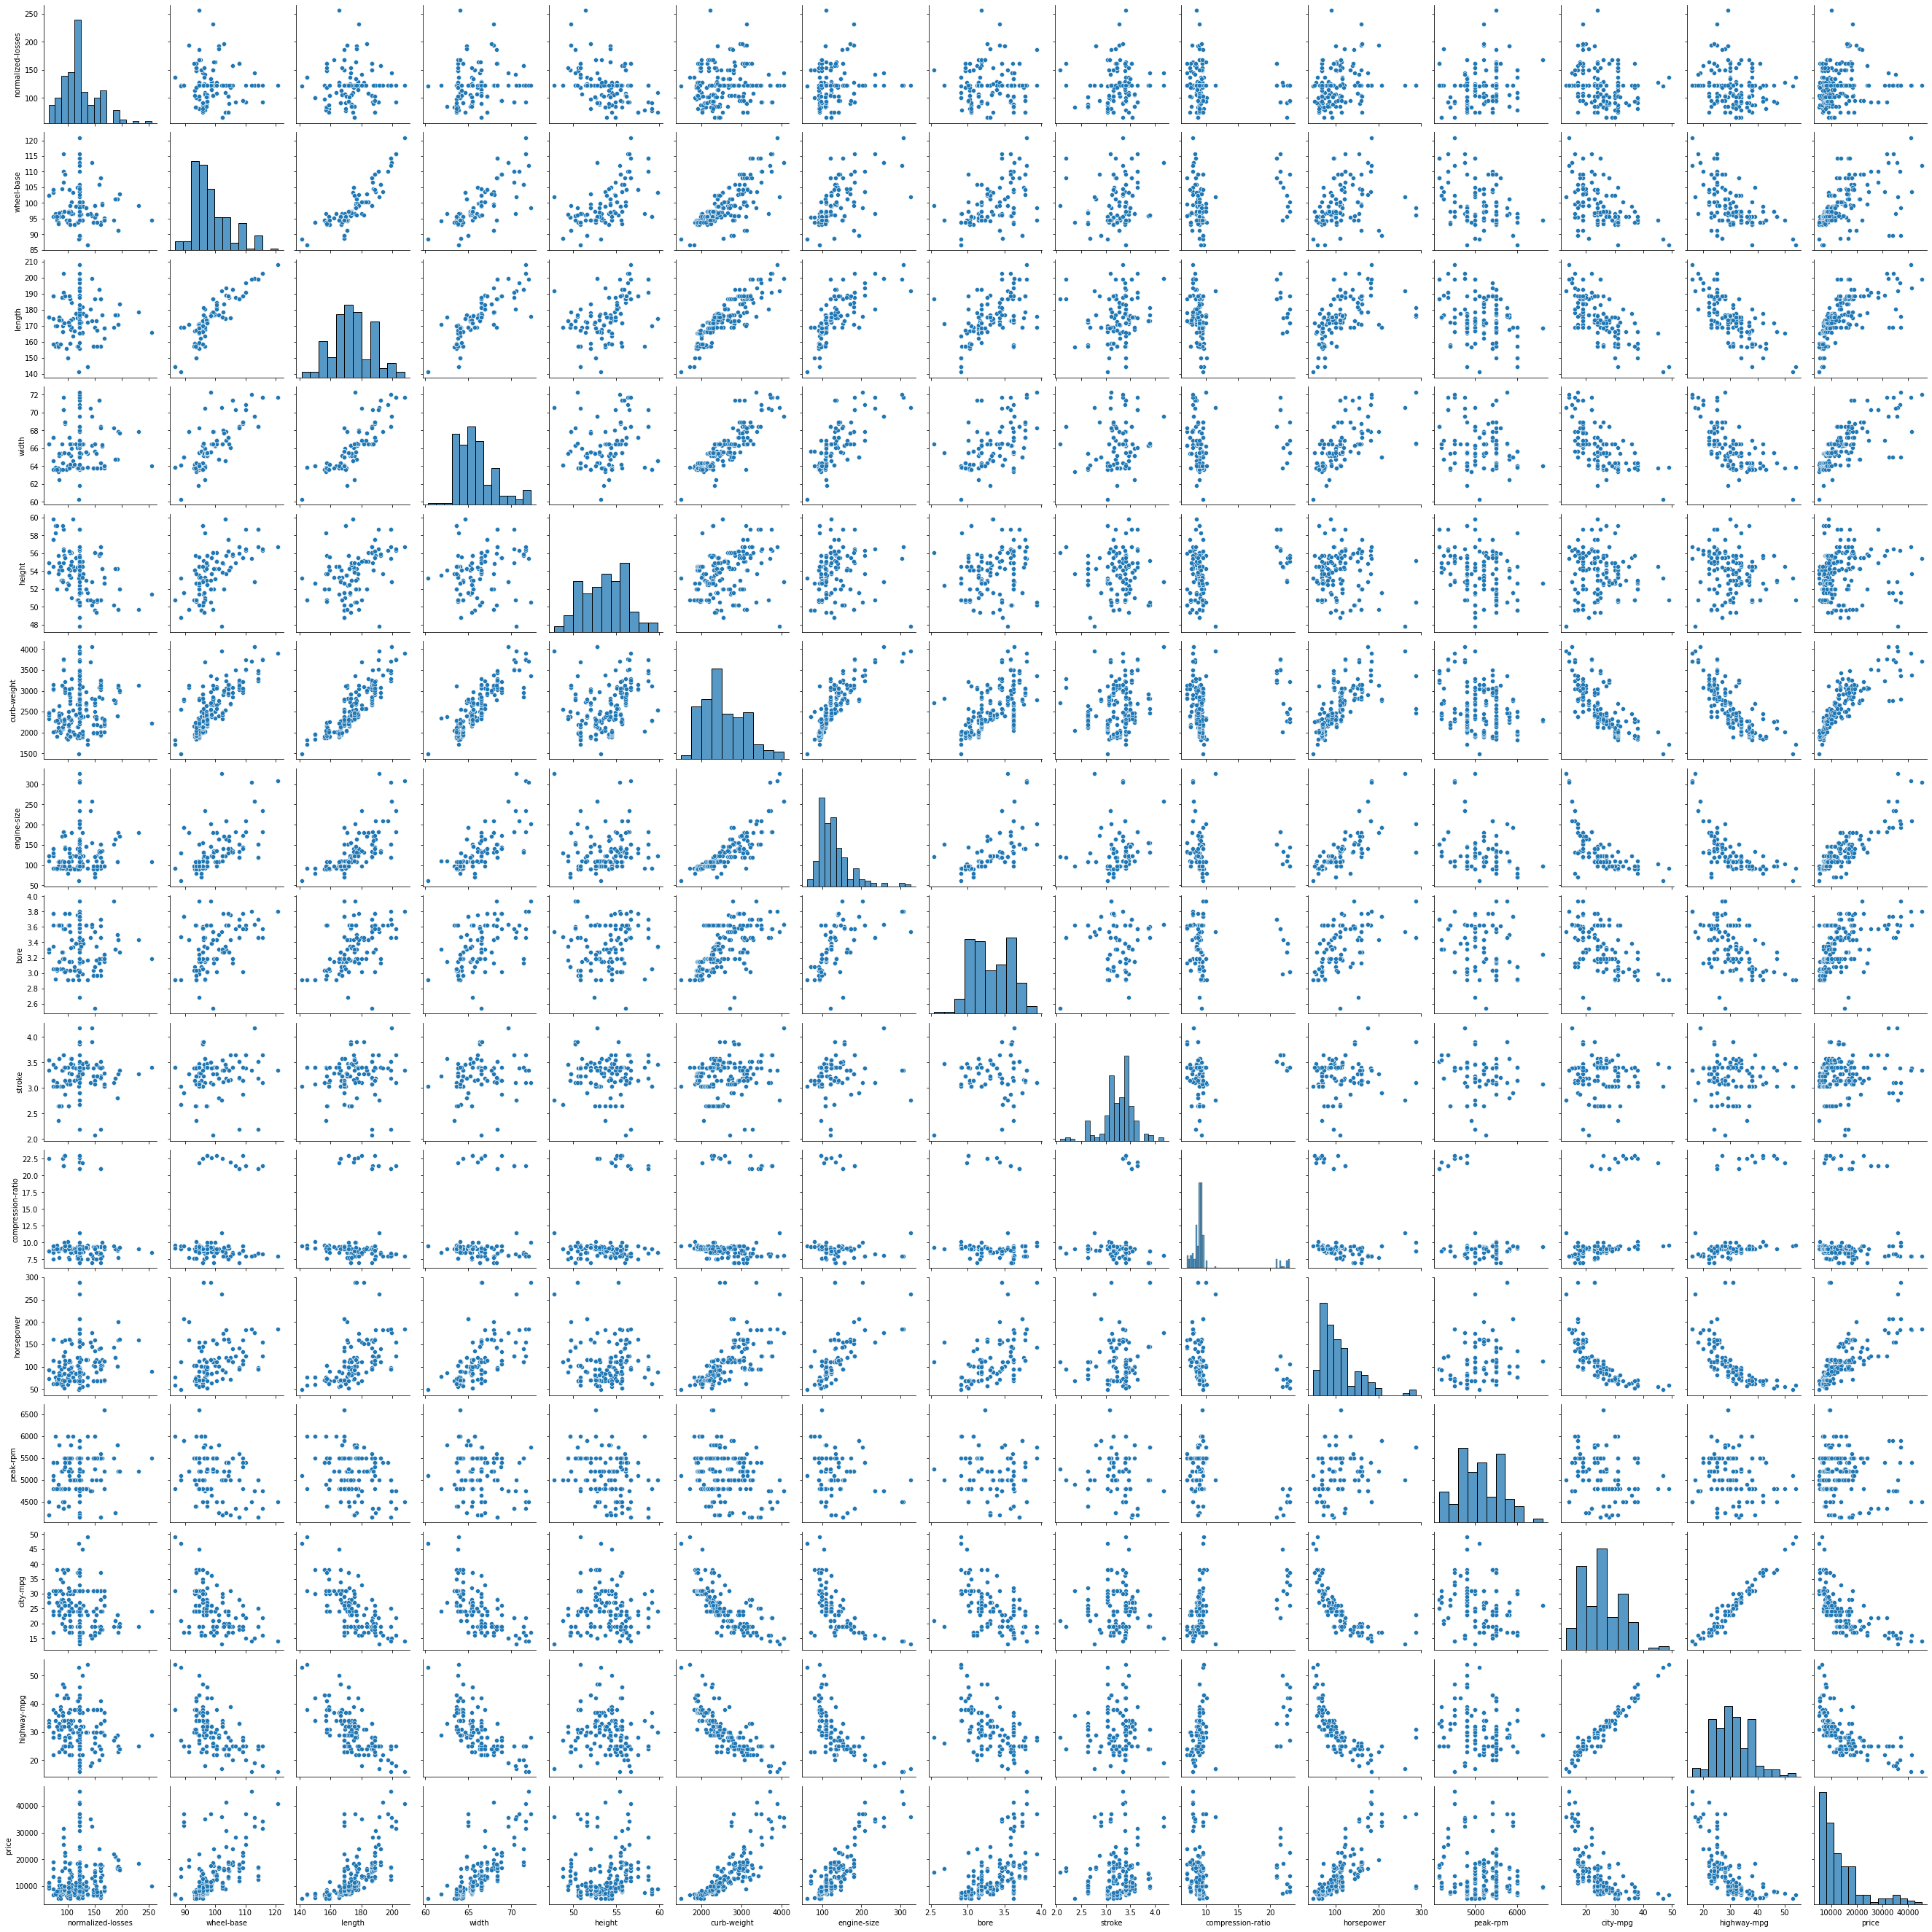

In [ ]:
fig = plt.figure(figsize=(25,20))
ax = sns.pairplot(data= df_num)


from the pair plot we can see distribution of different numerical data with respect to price.


* normalized-losses doesn't has linear relation with price
* 'wheel-base', 'length', 'width' has linear relations with price
* hight doesn't has linear relation with price
* 'curb-weight','engine-size' has linear relation with price
* 'bore', 'stroke','compression-ratio' doesn't has linear relation with price
* horsepower has linear relation with price
* peak-rpm doesn't has linear relation with price
* 'city-mpg','highway-mpg' has negative correlation with price 









In [65]:
# binning horsepower
df.sort_values('horsepower', inplace=True, ascending = True)
df['horsepower'].unique()

array([ 48.        ,  52.        ,  55.        ,  56.        ,
        58.        ,  60.        ,  62.        ,  64.        ,
        68.        ,  69.        ,  70.        ,  72.        ,
        73.        ,  76.        ,  78.        ,  82.        ,
        84.        ,  85.        ,  86.        ,  88.        ,
        90.        ,  92.        ,  94.        ,  95.        ,
        97.        , 100.        , 101.        , 102.        ,
       104.25615764, 106.        , 110.        , 111.        ,
       112.        , 114.        , 115.        , 116.        ,
       120.        , 121.        , 123.        , 134.        ,
       135.        , 140.        , 142.        , 143.        ,
       145.        , 152.        , 154.        , 155.        ,
       156.        , 160.        , 161.        , 162.        ,
       175.        , 176.        , 182.        , 184.        ,
       200.        , 207.        , 262.        , 288.        ])

In [66]:

def f(x):
    if x <= 90 :
        x = "low_hp"
    elif x >= 134 :
        x = "high_hp"
    else :
        x ='medium_hp'
    return x

In [67]:
df['Hp'] = df['horsepower'].apply(f)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Hp
18,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0,low_hp
182,2,122.0,volkswagen,diesel,std,two,sedan,fwd,front,97.3,...,idi,3.01,3.40,23.0,52.0,4800.0,37,46,7775.0,low_hp
184,2,94.0,volkswagen,diesel,std,four,sedan,fwd,front,97.3,...,idi,3.01,3.40,23.0,52.0,4800.0,37,46,7995.0,low_hp
90,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,...,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099.0,low_hp
158,0,91.0,toyota,diesel,std,four,sedan,fwd,front,95.7,...,idi,3.27,3.35,22.5,56.0,4500.0,34,36,7898.0,low_hp


In [68]:
df.groupby(['Hp'])['price'].mean()

Hp
high_hp      22717.125207
low_hp        7996.892953
medium_hp    14244.791667
Name: price, dtype: float64

hp value count for each category: 
 low_hp       91
medium_hp    72
high_hp      42
Name: Hp, dtype: int64


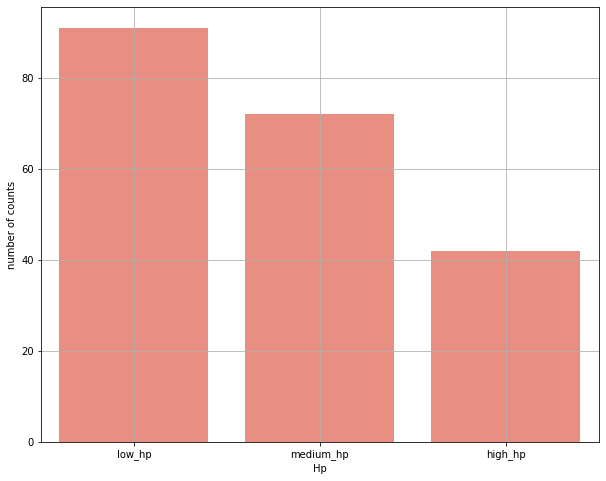

In [69]:

print('hp value count for each category:', '\n' , df['Hp'].value_counts())
plt.figure(figsize=(10,8))
ax = sns.countplot(x=df['Hp'], color= 'salmon')
ax.set(xlabel='Hp', ylabel='number of counts')
ax.grid()
plt.show()

**heat map to find correlation between atributes and target veriable**

<p3>Pearson Correlation</p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

 sometimes we would like to know the significant of the correlation estimate. 

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

 We can obtain this information using  "stats" module in the "scipy"  library.

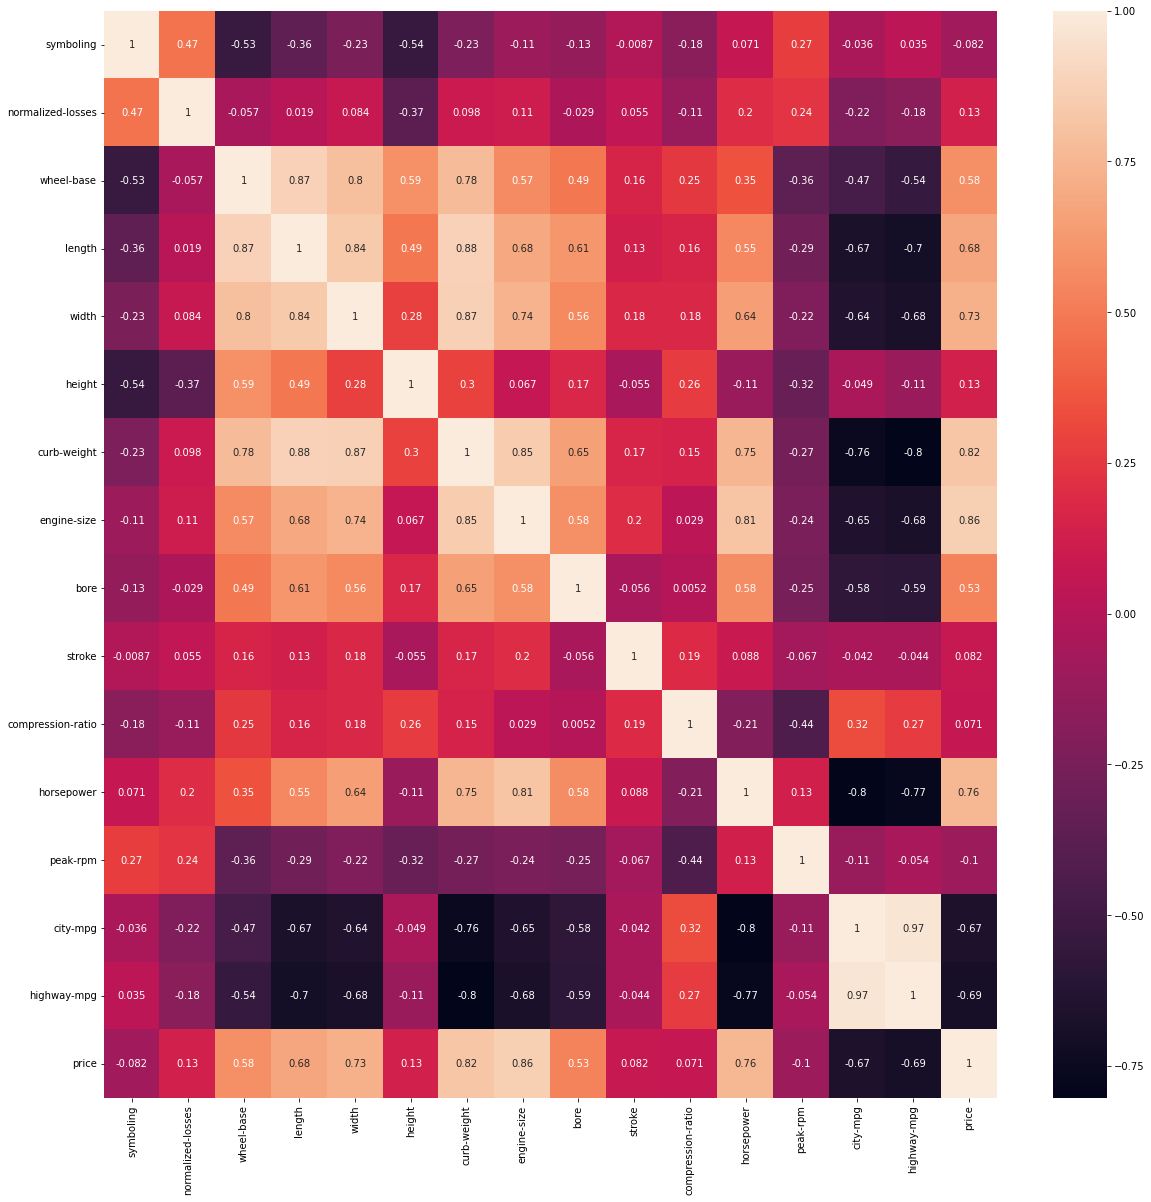

In [49]:
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot= True)

In [50]:
cor

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.532300
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961,0.082095


In [51]:
cor_target = abs(cor['price'])

In [52]:
most_corelated = cor_target[cor_target > 0.6]
most_corelated

length         0.682986
width          0.728699
curb-weight    0.820825
engine-size    0.861752
horsepower     0.757917
city-mpg       0.667449
highway-mpg    0.690526
price          1.000000
Name: price, dtype: float64

In [53]:
df_mostly_cor = df[['length','width','curb-weight','engine-size','horsepower','city-mpg','highway-mpg','price']]
df_mostly_cor.head()

,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price
0,168.8,64.1,2548,130,111.0,21,27,13495.0
1,168.8,64.1,2548,130,111.0,21,27,16500.0
2,171.2,65.5,2823,152,154.0,19,26,16500.0
3,176.6,66.2,2337,109,102.0,24,30,13950.0
4,176.6,66.4,2824,136,115.0,18,22,17450.0


In [54]:
from scipy import stats

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [56]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.7579169537498178  with a P-value of P =  1.6076703978129875e-39


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.757, close to 1)</p>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.

In [57]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6829862954386219  with a P-value of P =  1.6498873291218535e-29


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>

 Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':

In [60]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7286988175931842  with a P-value of P = 3.214520483804299e-35


##### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.728).

 Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':

In [62]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8208247333547288  with a P-value of P =  2.8663321070274196e-51


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.820).</p>

<h3>Engine-size vs Price</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':

In [61]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.861752243685972  with a P-value of P = 9.669661923635875e-62


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.861).</p>

 We can relate the process for each 'City-mpg'  and 'Highway-mpg':

In [59]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6674492651600004  with a P-value of P =  8.463700497727807e-28


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.</p>

In [58]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.6905257341183487  with a P-value of P =  2.2324674058375567e-30


##### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

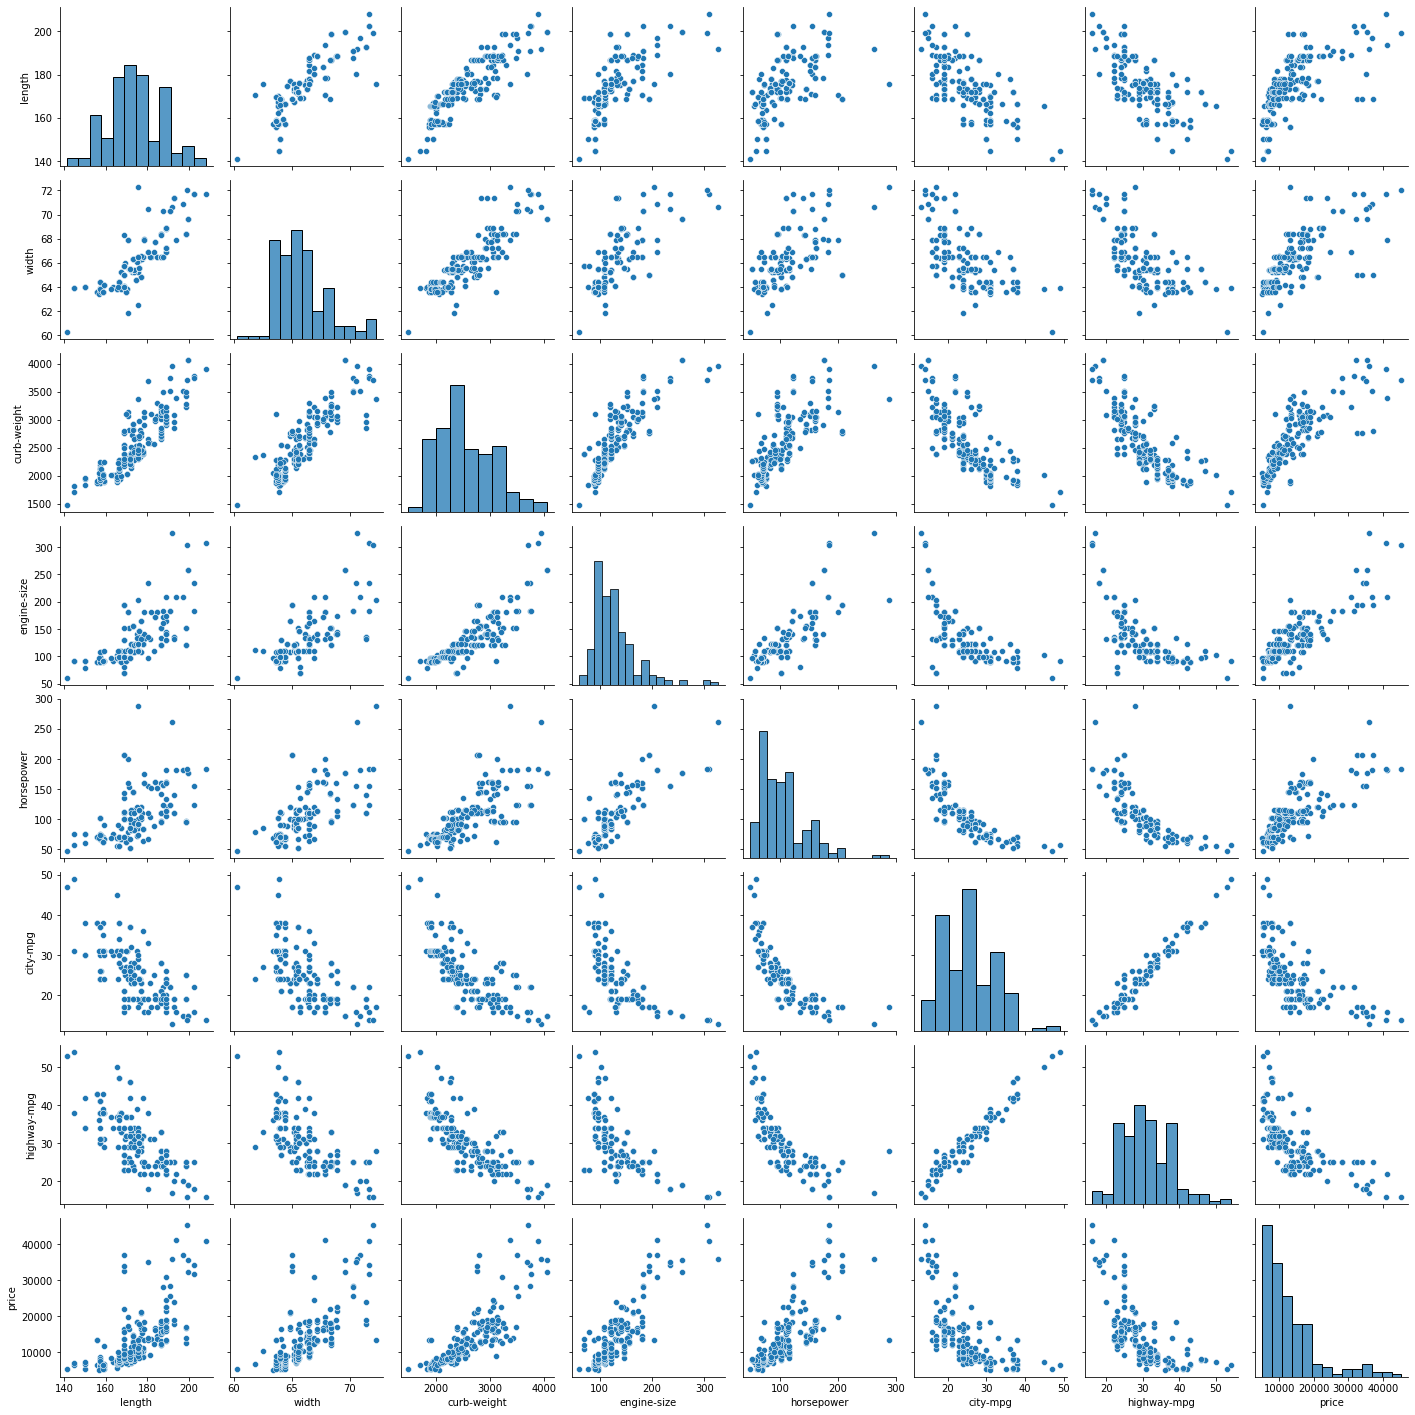

In [63]:
#visualization of mostly correlated atributes
sns.pairplot(df_mostly_cor)

In [70]:
df_1 = df.drop(['Hp'],axis=1)
df_1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
18,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0
182,2,122.0,volkswagen,diesel,std,two,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,52.0,4800.0,37,46,7775.0
184,2,94.0,volkswagen,diesel,std,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,52.0,4800.0,37,46,7995.0
90,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55.0,4800.0,45,50,7099.0
158,0,91.0,toyota,diesel,std,four,sedan,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56.0,4500.0,34,36,7898.0


In [72]:
from sklearn.preprocessing import  StandardScaler

sc = StandardScaler()

In [83]:
df_final = pd.get_dummies(df_mostly_cor)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


In [85]:
X = df_final.drop(['price'], axis=1)
y = df_final['price']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 111)

In [87]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
print('Dimention of X_train',X_train.shape)
print('Dimention of X_test',X_test.shape)
print('Dimention of y_train',y_train.shape)
print('Dimention of y_test',y_test.shape)

Dimention of X_train (164, 7)
Dimention of X_test (41, 7)
Dimention of y_train (164,)
Dimention of y_test (41,)


#Linear Regression

In [89]:
le = LinearRegression()

le.fit(X_train, y_train)
y_pred_le = le.predict(X_test)
y_pred_le_train = le.predict(X_train)


In [90]:
print("r2 score train:",r2_score(y_train,y_pred_le_train))
print("mean_absolute_error train:",mean_absolute_error(y_train,y_pred_le_train),'\n')
print("r2 score test:",r2_score(y_test,y_pred_le))
print("mean_absolute_error test:",mean_absolute_error(y_test,y_pred_le))


r2 score train: 0.7651546107864985
mean_absolute_error train: 2489.6778318254896 

r2 score test: 0.7697079924909522
mean_absolute_error test: 2963.2052830899574


#XGBoost

In [91]:
import xgboost as xgb

In [92]:
regressor = xgb.XGBRegressor(n_estimators=100,reg_lambda=1,gamma=0,max_depth=3)

In [93]:
regressor.fit(X_train, y_train)

[18:12:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [94]:
y_pred_xgb = regressor.predict(X_test)
y_pred_xgb_train = regressor.predict(X_train)

In [95]:
print("r2 score train:",r2_score(y_train,y_pred_xgb_train))
print("mean_absolute_error train:",mean_absolute_error(y_train,y_pred_xgb_train),'\n')
print("r2 score test:",r2_score(y_test,y_pred_xgb))
print("mean_absolute_error test:",mean_absolute_error(y_test,y_pred_xgb))

r2 score train: 0.9807977756181454
mean_absolute_error train: 717.4460357380874 

r2 score test: 0.9230885139208208
mean_absolute_error test: 1980.882765870059


#SVM

In [96]:
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.svm import SVR
svr = SVR()

In [97]:
param_grid = {'kernel':['linear','poly', 'rbf', 'sigmoid'],'C':[114,113,115 ],
              'epsilon':[25,26,27],'gamma':[0.95,0.94,0.93]
             }

gs_svr = GridSearchCV(estimator = svr, param_grid= param_grid,cv =10, n_jobs = -1, verbose=2, scoring='neg_mean_squared_error' )

gs_svr.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [114, 113, 115], 'epsilon': [25, 26, 27],
                         'gamma': [0.95, 0.94, 0.93],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=2)

In [98]:
gs_svr.best_estimator_

SVR(C=113, epsilon=27, gamma=0.95, kernel='linear')

In [99]:
y_pred_svr =gs_svr.best_estimator_.predict(X_test)
y_pred_svr_train = gs_svr.best_estimator_.predict(X_train)

In [101]:

print("r2 score train:",r2_score(y_train,y_pred_svr_train),)
print("mean_absolute_error train:",mean_absolute_error(y_train,y_pred_svr_train),'\n')
print("r2 score test:",r2_score(y_test,y_pred_svr))
print("mean_absolute_error test:",mean_absolute_error(y_test,y_pred_svr))


r2 score train: 0.6764807200318211
mean_absolute_error train: 2430.220308798893 

r2 score test: 0.662177384130184
mean_absolute_error test: 3282.4613338213267


#Random Forest

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [103]:
param_grid = {'n_estimators': [219,220,221],
             'min_samples_split':[18,19,20],
             'max_depth':[24,25,26]}
                          
gs_rf= GridSearchCV(estimator = rf , param_grid= param_grid,cv =10, n_jobs = -1, verbose=2, scoring='neg_mean_squared_error' )
gs_rf.fit(X_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [24, 25, 26],
                         'min_samples_split': [18, 19, 20],
                         'n_estimators': [219, 220, 221]},
             scoring='neg_mean_squared_error', verbose=2)

In [104]:
gs_rf.best_estimator_

RandomForestRegressor(max_depth=25, min_samples_split=19, n_estimators=219)

In [105]:
y_pred_rf =gs_rf.best_estimator_.predict(X_test)
y_pred_rf_train = gs_rf.best_estimator_.predict(X_train)

In [106]:

print("r2 score train:",r2_score(y_train,y_pred_rf_train))
print("mean_absolute_error train:",mean_absolute_error(y_train,y_pred_rf_train),'\n')
print("r2 score test:",r2_score(y_test,y_pred_rf))
print("mean_absolute_error test:",mean_absolute_error(y_test,y_pred_rf))


r2 score train: 0.8970678535489482
mean_absolute_error train: 1419.1255369388832 

r2 score test: 0.9032788709050827
mean_absolute_error test: 2153.5633927555323


# Decision Tree

In [107]:
from sklearn.tree import DecisionTreeRegressor
dc = DecisionTreeRegressor()

In [108]:

param_grid = {'min_samples_split':[18,19,20,21,22],
             'max_depth':[48,49,50,51,52]}
gs_dc = GridSearchCV(estimator = dc, param_grid= param_grid, cv= 10, n_jobs= -1, verbose= 2)
gs_dc.fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [48, 49, 50, 51, 52],
                         'min_samples_split': [18, 19, 20, 21, 22]},
             verbose=2)

In [109]:
gs_dc.best_estimator_

DecisionTreeRegressor(max_depth=51, min_samples_split=22)

In [110]:
y_pred_dc =gs_dc.best_estimator_.predict(X_test)
y_pred_dc_train = gs_dc.best_estimator_.predict(X_train)

In [111]:

print("r2 score train:",r2_score(y_train,y_pred_dc_train))
print("mean_absolute_error train:",mean_absolute_error(y_train,y_pred_dc_train),'\n')
print("r2 score test:",r2_score(y_test,y_pred_dc))
print("mean_absolute_error test:",mean_absolute_error(y_test,y_pred_dc))


r2 score train: 0.8804122349741329
mean_absolute_error train: 1379.5188986459416 

r2 score test: 0.8779126189893285
mean_absolute_error test: 2554.8316659326765
